# Poisonous Mushrooms

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Train a model to predict whether or not a mushroom is poisonous.

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
sns.set_style('whitegrid')

## Load the dataset

In [2]:
file_url = 'https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Machine_Learning_in_Python/Week2/Labs/data/mushrooms.csv'
df = pd.read_csv(file_url)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Understand the dataset

The [UCI Mushroom Data Set](http://archive.ics.uci.edu/dataset/73/mushroom) includes descriptions of samples corresponding to 23 species of gilled mushrooms. Each species is identified as definitely edible or definitely poisonous.

|       Variable Name      |                                             Description                                             |
|:------------------------:|:---------------------------------------------------------------------------------------------------:|
| class                    | poisonous=p, edible=e                                                                               |
| cap-shape                | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s                                                |
| cap-surface              | fibrous=f,grooves=g,scaly=y,smooth=s                                                                |
| cap-color                | brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y                    |
| bruises                  | bruises=t,no=f                                                                                      |
| odor                     | almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s                        |
| gill-attachment          | attached=a,descending=d,free=f,notched=n                                                            |
| gill-spacing             | close=c,crowded=w,distant=d                                                                         |
| gill-size                | broad=b,narrow=n                                                                                    |
| gill-color               | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y |
| stalk-shape              | enlarging=e,tapering=t                                                                              |
| stalk-root               | bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?                                    |
| stalk-surface-above-ring | fibrous=f,scaly=y,silky=k,smooth=s                                                                  |
| stalk-surface-below-ring | fibrous=f,scaly=y,silky=k,smooth=s                                                                  |
| stalk-color-above-ring   | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y                            |
| stalk-color-below-ring   | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y                            |
| veil-type                | partial=p,universal=u                                                                               |
| veil-color               | brown=n,orange=o,white=w,yellow=y                                                                   |
| ring-number              | none=n,one=o,two=t                                                                                  |
| ring-type                | cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z                      |
| spore-print-color        | black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y                      |
| population               | abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y                                 |
| habitat                  | grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d                                       |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Preprocess the dataset

In [4]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


## Visualize the class distribution

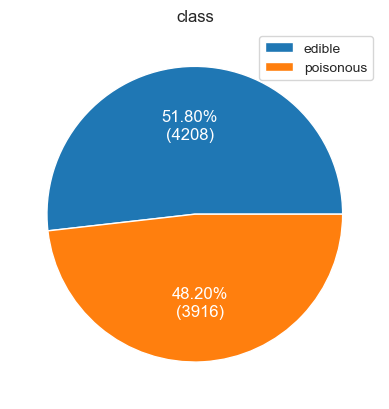

In [5]:
labels, sizes = np.unique(df["class_p"], return_counts=True)

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(["poisonous" if i else "edible" for i in labels])
ax.set_title("class")
plt.show()

## Split the dataset into train and test subsets

In [6]:
X = df.drop("class_p", axis=1)
y = df["class_p"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6093, 95)
X_test shape: (2031, 95)


##  Train a Decision Tree classifier

In [7]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Get the most important features

In [8]:
feature_importances = pd.DataFrame(data={"Feature": X_train.columns, "Gini importance": classifier.feature_importances_}).sort_values(by="Gini importance", ascending=False).reset_index(drop=True)
most_important_features = feature_importances[feature_importances["Gini importance"] >= 0.01]
most_important_features

,Feature,Gini importance
0,odor_n,0.625144
1,stalk-root_c,0.169176
2,stalk-surface-below-ring_y,0.100325
3,spore-print-color_r,0.034375
4,odor_l,0.023504
5,stalk-color-above-ring_w,0.017094
6,spore-print-color_u,0.010353


## Find the optimal hyperparameters for a Support Vector Classifier

In [9]:
C = np.logspace(-2, 2, 5)
parameters = {'C': C}

svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='recall')
clf.fit(X_train[most_important_features["Feature"]], y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='recall')

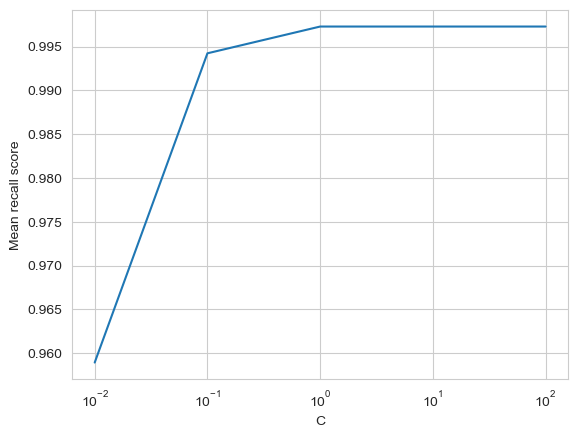

In [10]:
plt.figure()
plt.plot(C, clf.cv_results_['mean_test_score'])
plt.xlabel("C")
plt.ylabel("Mean recall score")
plt.xscale("log")
plt.show()

## Evaluate the model

              precision    recall  f1-score   support

       False     1.0000    0.9906    0.9953      1061
        True     0.9898    1.0000    0.9949       970

    accuracy                         0.9951      2031
   macro avg     0.9949    0.9953    0.9951      2031
weighted avg     0.9951    0.9951    0.9951      2031



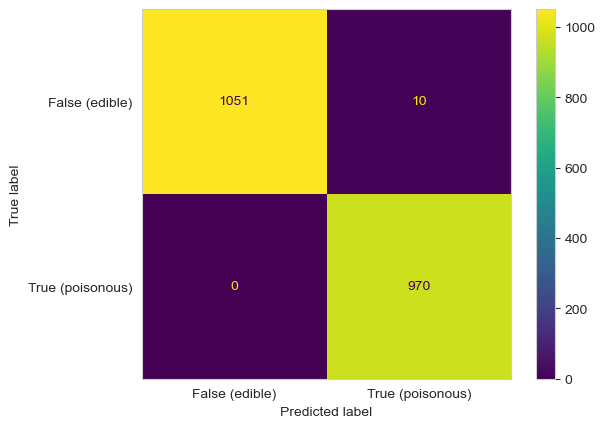

In [11]:
y_pred = clf.best_estimator_.predict(X_test[most_important_features["Feature"]])
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["False (edible)", "True (poisonous)"])
plt.grid(False)
plt.show()